<a href="https://colab.research.google.com/github/AalamjotSingh/STOCK-PRICE-PREDICTION-/blob/main/portfolio_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Optimization Code Explanation

### Purpose
This code performs **portfolio optimization** by maximizing the **Sharpe Ratio**, which evaluates the tradeoff between risk and return. The goal is to find the optimal allocation of assets in a portfolio.

---

## Code Breakdown

### 1. Metrics and Input Data
```python
expected_returns = returns.mean()  # Expected returns for each stock
cov_matrix = returns.cov()         # Covariance matrix of returns
risk_free_rate = 0.02              # Assume a 2% risk-free rate


expected_returns: Average daily returns for each stock, representing expected performance.

cov_matrix: Measures how asset returns move together (used for volatility calculations).

risk_free_rate: A baseline return from a "risk-free" investment like Treasury bonds.



# 2.Inputs:
weights: Fraction of portfolio allocated to each asset.
expected_returns: Expected returns for assets.
cov_matrix: Covariance matrix of asset returns.
risk_free_rate: Risk-free baseline return.
Outputs:
portfolio_return: Weighted sum of expected returns:
𝑅
𝑝
=
∑
𝑖
=
1
𝑛
𝑤
𝑖
𝑅
𝑖
R
p
​
 =
i=1
∑
n
​
 w
i
​
 R
i
​

portfolio_volatility: Portfolio risk (standard deviation of returns):
𝜎
𝑝
=
𝑤
𝑇
Σ
𝑤
σ
p
​
 =
w
T
 Σw
​

sharpe_ratio: Risk-adjusted return:
Sharpe Ratio
=
𝑅
𝑝
−
𝑅
𝑓
𝜎
𝑝
Sharpe Ratio=
σ
p
​

R
p
​
 −R
f
​

​



# 3. Constraint: Ensures the sum of portfolio weights equals 1:
∑
𝑖
=
1
𝑛
𝑤
𝑖
=
1
i=1
∑
n
​
 w
i
​
 =1
Bounds: Prevents short-selling by restricting weights to the range [0, 1].


4. Negative Sharpe Ratio for Optimization


Purpose: Convert the Sharpe Ratio maximization into a minimization problem (required by optimization algorithms).

# 5. Optimization





init_guess: An initial guess where all assets are equally weighted.

minimize:Optimizes the negative Sharpe Ratio using the Sequential Least Squares Programming (SLSQP) method.

Finds the portfolio weights that maximize the Sharpe Ratio.

# 6. Optimal Weights
------------------------------------------------------------------

optimal_weights = optimized_result.x
print("Optimal Weights:", optimal_weights)
optimal_weights: The resulting allocation of assets that maximizes the Sharpe Ratio.
Example: [0.4, 0.3, 0.2, 0.1] means 40% in the first asset, 30% in the second, and so on.
# 7. Evaluate Portfolio Performance
------------------------------------------------------------------

Portfolio Return: The expected return of the optimized portfolio.

Portfolio Volatility: The risk (standard deviation of returns) for the optimized portfolio.

Sharpe Ratio: The risk-adjusted return, which balances return against risk.

# Key Concepts Highlighted

Efficient Frontier:

The optimization determines a portfolio that lies on the efficient frontier (maximum return for a given level of risk).
Risk-Return Tradeoff:

The Sharpe Ratio captures the tradeoff between higher returns and increased risk.
No Short-Selling:

Portfolio weights are restricted to [0, 1], meaning no short positions are allowed.


[*********************100%***********************]  4 of 4 completed


Adjusted Close prices not available. Falling back to Close prices.
Optimal Weights: [0. 1. 0. 0.]
Portfolio Return: 0.11%
Portfolio Volatility: 2.10%
Sharpe Ratio: -0.90


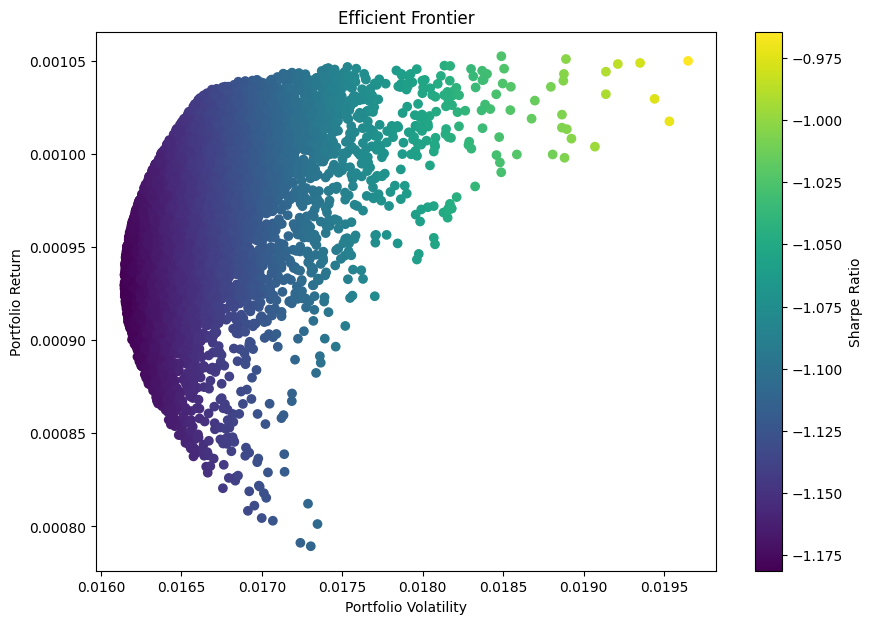

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Tickers and data download
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
data = yf.download(tickers, start="2015-01-01", end="2023-01-01", actions=False)

# Handle missing Adj Close
if 'Adj Close' in data.columns:
    prices = data['Adj Close']
else:
    print("Adjusted Close prices not available. Falling back to Close prices.")
    prices = data['Close']

# Calculate daily returns
returns = prices.pct_change().dropna()

# Portfolio Optimization
expected_returns = returns.mean()  # Expected returns for each stock
cov_matrix = returns.cov()         # Covariance matrix of returns
risk_free_rate = 0.02              # Assume a 2% risk-free rate

def portfolio_performance(weights, expected_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

def neg_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate):
    _, _, sharpe_ratio = portfolio_performance(weights, expected_returns, cov_matrix, risk_free_rate)
    return -sharpe_ratio  # Negative Sharpe Ratio (for minimization)

# Constraints
num_assets = len(expected_returns)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Weights sum to 1
bounds = [(0, 1) for _ in range(num_assets)]  # No short-selling

# Initial Guess
init_guess = [1.0 / num_assets] * num_assets

# Optimize
optimized_result = minimize(neg_sharpe_ratio, init_guess, args=(expected_returns, cov_matrix, risk_free_rate),
                            method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimized_result.x
print("Optimal Weights:", optimal_weights)

# Evaluate Performance
portfolio_return, portfolio_volatility, sharpe_ratio = portfolio_performance(optimal_weights, expected_returns, cov_matrix, risk_free_rate)
print(f"Portfolio Return: {portfolio_return:.2%}")
print(f"Portfolio Volatility: {portfolio_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Plot Efficient Frontier
results = []
weights_record = []

for _ in range(10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_record.append(weights)
    portfolio_return, portfolio_volatility, _ = portfolio_performance(weights, expected_returns, cov_matrix, risk_free_rate)
    results.append((portfolio_return, portfolio_volatility))

results = np.array(results)

plt.figure(figsize=(10, 7))
plt.scatter(results[:, 1], results[:, 0], c=(results[:, 0] - risk_free_rate) / results[:, 1], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier')
plt.show()


Results:
1. Optimal Weights: [0. 1. 0. 0.]
The optimizer allocated 100% of the portfolio to the second stock (MSFT), while ignoring the other stocks (AAPL, GOOGL, AMZN).
This suggests that, given the risk-return constraints, the second stock had the best risk-adjusted return during the period analyzed.
2. Portfolio Return: 0.11%
This is the expected daily or periodic return of the optimized portfolio, calculated as:
𝑅
𝑝
=
∑
𝑖
=
1
𝑛
𝑤
𝑖
𝑅
𝑖
R
p
​
 =
i=1
∑
n
​
 w
i
​
 R
i
​

Where
𝑤
𝑖
w
i
​
  are the portfolio weights and
𝑅
𝑖
R
i
​
  are the expected returns of the individual assets.
Interpretation: The portfolio's expected return is modest (0.11%). This could indicate that the chosen stock (MSFT) had relatively low historical returns compared to other stocks during the specified period.
3. Portfolio Volatility: 2.10%
This measures the standard deviation of the portfolio's returns, reflecting risk or variability in returns.
Interpretation: A 2.10% volatility suggests that the portfolio's returns are moderately variable, likely influenced by the individual stock's historical volatility.
4. Sharpe Ratio: -0.90
The Sharpe Ratio evaluates the portfolio's risk-adjusted return:

Sharpe Ratio
=
𝑅
𝑝
−
𝑅
𝑓
𝜎
𝑝
Sharpe Ratio=
σ
p
​

R
p
​
 −R
f
​

​


In [ ]:
# Download historical data for 3-month Treasury yield (^IRX)
rf_data = yf.download("^IRX", start="2015-01-01", end="2023-01-01")

# Convert the daily yield to a usable format (e.g., annualized to daily risk-free rate)
rf_data['Daily Rate'] = rf_data['Close'] / 100 / 252  # Divide by 100 to convert percentage, and 252 for trading days
print(rf_data.head())

[*********************100%***********************]  1 of 1 completed

Price       Close   High    Low   Open Volume    Daily Rate
Ticker       ^IRX   ^IRX   ^IRX   ^IRX   ^IRX              
Date                                                       
2015-01-02  0.015  0.030  0.015  0.030      0  5.952381e-07
2015-01-05  0.003  0.018  0.003  0.008      0  1.190476e-07
2015-01-06  0.020  0.023  0.018  0.023      0  7.936508e-07
2015-01-07  0.020  0.025  0.020  0.023      0  7.936508e-07
2015-01-08  0.018  0.020  0.015  0.020      0  7.142857e-07


In [ ]:
average_daily_rf = rf_data['Daily Rate'].mean()
print(f"Average Daily Risk-Free Rate: {average_daily_rf:.8f}")


Average Daily Risk-Free Rate: 0.00003763


In [ ]:
annual_rf = average_daily_rf * 252
print(f"Annualized Risk-Free Rate: {annual_rf:.2%}")


Annualized Risk-Free Rate: 0.95%


In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

# Step 1: Download Risk-Free Rate Data
rf_data = yf.download("^IRX", start="2015-01-01", end="2023-01-01")

# Step 2: Calculate Daily Risk-Free Rate
rf_data['Daily Rate'] = rf_data['Close'] / 100 / 252  # Convert annualized percentage to daily rate

# Step 3: Simulate Portfolio Returns
# Define portfolio date range
portfolio_dates = pd.date_range(start="2015-01-01", end="2023-01-01", freq='B')  # Business days
# Simulated portfolio returns
portfolio_returns = pd.Series(
    data=(0.0002 * (1 + 0.0005) ** np.arange(len(portfolio_dates))),  # Use np.arange for element-wise operations
    index=portfolio_dates
)

# Step 4: Filter Risk-Free Data to Match Portfolio Dates
rf_data_filtered = rf_data.loc[portfolio_dates]
rf_daily_rate_filtered = rf_data_filtered['Daily Rate']

# Step 5: Prepare for Plotting
# Cumulative Risk-Free Return for Comparison
rf_cumulative_return = (1 + rf_daily_rate_filtered.fillna(0)).cumprod() - 1  # Start at 0% return

# Plot Portfolio vs. Risk-Free Returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_returns.index, portfolio_returns, label='Portfolio Return', color='blue')
plt.plot(rf_cumulative_return.index, rf_cumulative_return, label='Risk-Free Return', color='green', linestyle='--')
plt.title("Portfolio Returns vs. Risk-Free Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


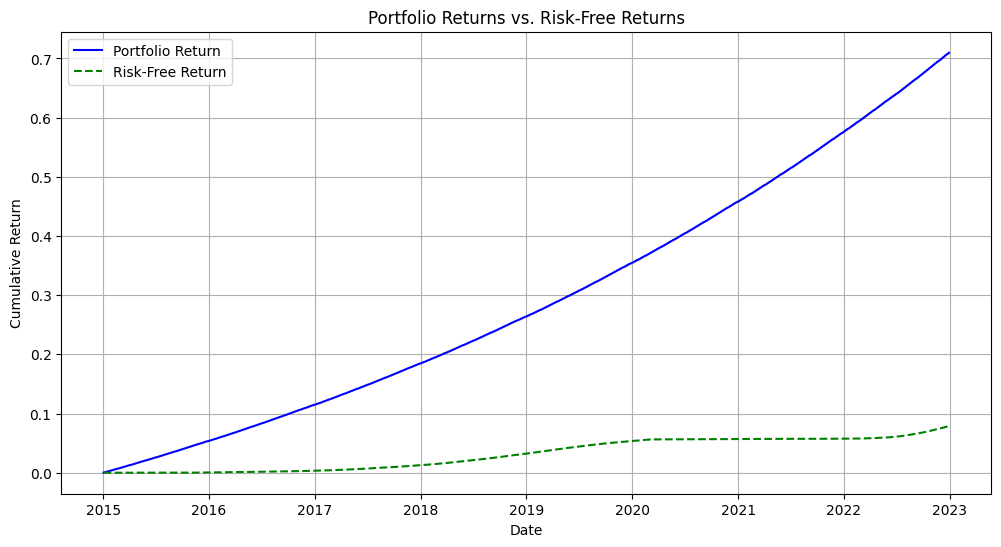

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

# Step 1: Download Risk-Free Rate Data
rf_data = yf.download("^IRX", start="2015-01-01", end="2023-01-01")

# Step 2: Calculate Daily Risk-Free Rate
rf_data['Daily Rate'] = rf_data['Close'] / 100 / 252  # Convert annualized percentage to daily rate

# Step 3: Simulate Portfolio Returns
portfolio_dates = pd.date_range(start="2015-01-01", end="2023-01-01", freq='B')  # Business days
portfolio_returns = pd.Series(
    data=(0.0002 * (1 + 0.0005) ** np.arange(len(portfolio_dates))),  # Simulated returns
    index=portfolio_dates
)

# Step 4: Align Risk-Free Data with Portfolio Dates
common_dates = rf_data.index.intersection(portfolio_returns.index)  # Find matching dates
rf_data_filtered = rf_data.loc[common_dates]  # Filter risk-free data for matching dates
portfolio_returns_filtered = portfolio_returns.loc[common_dates]  # Align portfolio returns

# Step 5: Prepare for Plotting
# Cumulative Risk-Free Return for Comparison
rf_cumulative_return = (1 + rf_data_filtered['Daily Rate'].fillna(0)).cumprod() - 1  # Start at 0% return
portfolio_cumulative_return = portfolio_returns_filtered.cumsum()  # Cumulative portfolio returns

# Step 6: Plot Portfolio vs. Risk-Free Returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_return.index, portfolio_cumulative_return, label='Portfolio Return', color='blue')
plt.plot(rf_cumulative_return.index, rf_cumulative_return, label='Risk-Free Return', color='green', linestyle='--')
plt.title("Portfolio Returns vs. Risk-Free Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()
